#Prerequisites

In [105]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Loading our Dataset

In [124]:
# Loading our data
df =pd.read_csv('https://bit.ly/3deaKEM')
df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,9:43:06 AM,15,5,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,10:05:23 AM,13,1,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [125]:
#getting the glossary data
glossary = pd.read_csv('https://bit.ly/30O3xsr')
glossary

,Order No,Unique number identifying the order
0,User Id,Unique number identifying the customer on a pl...
1,Vehicle Type,"For this competition limited to bikes, however..."
2,Platform Type,"Platform used to place the order, there are 4 ..."
3,Personal or Business,Customer type
4,Placement - Day of Month,Placement - Day of Month i.e 1-31
5,Placement - Weekday (Mo = 1),Placement - Weekday (Monday = 1)
6,Placement - Time,Placement - Time - Time of day the order was p...
7,Confirmation - Day of Month,Confirmation - Day of Month i.e 1-31
8,Confirmation - Weekday (Mo = 1),Confirmation - Weekday (Monday = 1)
9,Confirmation - Time,Confirmation - Time - Time of day the order wa...


#Checking, Cleaning, Exploratory Analysis

In [ ]:
# Getting a statistical summary of our dataset
df.describe()

In [127]:
# checking dataset shape
df.shape

(21201, 29)

In [128]:
# checking data types
df.dtypes

Order No                                      object
User Id                                       object
Vehicle Type                                  object
Platform Type                                  int64
Personal or Business                          object
Placement - Day of Month                       int64
Placement - Weekday (Mo = 1)                   int64
Placement - Time                              object
Confirmation - Day of Month                    int64
Confirmation - Weekday (Mo = 1)                int64
Confirmation - Time                           object
Arrival at Pickup - Day of Month               int64
Arrival at Pickup - Weekday (Mo = 1)           int64
Arrival at Pickup - Time                      object
Pickup - Day of Month                          int64
Pickup - Weekday (Mo = 1)                      int64
Pickup - Time                                 object
Arrival at Destination - Day of Month          int64
Arrival at Destination - Weekday (Mo = 1)     

In [129]:
# dropping duplicates, if any
df.drop_duplicates(inplace = True)
df.shape

(21201, 29)

In [ ]:
# checking for missing data
df.isna().sum()

In [131]:
#Confirming the percentage of missing data in Precipitation in millimeters
round(df['Precipitation in millimeters'].isnull().sum()/df.shape[0] *100,3)

97.396

In [132]:
#Drop THE precipitation column since it has more than 97% missing data
df.drop(columns = ['Precipitation in millimeters'], inplace = True)

In [ ]:
# checking for missing data
df.isna().sum()

In [135]:
# converinge the time column from 12 hour to 24 hours
from datetime import datetime
def convert_12_to_24_hour(time):
  in_time = datetime.strptime(time, "%I:%M:%S %p")
  out_time = datetime.strftime(in_time, "%H%M%S")
  return out_time

In [136]:
#testing our formula
tm = '09:09:09 PM'
print(convert_12_to_24_hour(tm))

210909


In [137]:
  # convert time columns from 12 hour to 24 hour system
  df['placement_time_24'] = df['Placement - Time'].apply(convert_12_to_24_hour)
  df['confirmation_time_24'] = df['Confirmation - Time'].apply(convert_12_to_24_hour)
  df['arrival_at_pickup_time_24'] = df['Arrival at Pickup - Time'].apply(convert_12_to_24_hour)
  df['pickup_time_24'] = df['Pickup - Time'].apply(convert_12_to_24_hour)
  df['arrival_at_destination_time_24'] = df['Arrival at Destination - Time'].apply(convert_12_to_24_hour)

In [ ]:
#dropping the unnecessary columns(12 hour)
df.drop(columns = ['Placement - Time','Confirmation - Time', 'Arrival at Pickup - Time', 'Pickup - Time', 'Arrival at Destination - Time'], inplace = True)
df.head()

In [ ]:
# create a column to pick the Hour of placement time
df['placement_time_HH'] = df['placement_time_24'].apply(lambda x: str(x)[:2])
df.head()

In [ ]:
# filling the nulls on temperature
df['Temperature'] = round(df['Temperature'].fillna(df.groupby('placement_time_HH')['Temperature'].transform('mean')),1)
# let's test if there are any remaining nulls
df.isnull().sum()

In [ ]:
#checking the unique items per column
df.nunique()

In [142]:
#dropping the unnecessary columns
df.drop(columns = ['Order No', 'Personal or Business', 'User Id', 'Rider Id', 'Vehicle Type'], inplace = True)

#Data Analysis

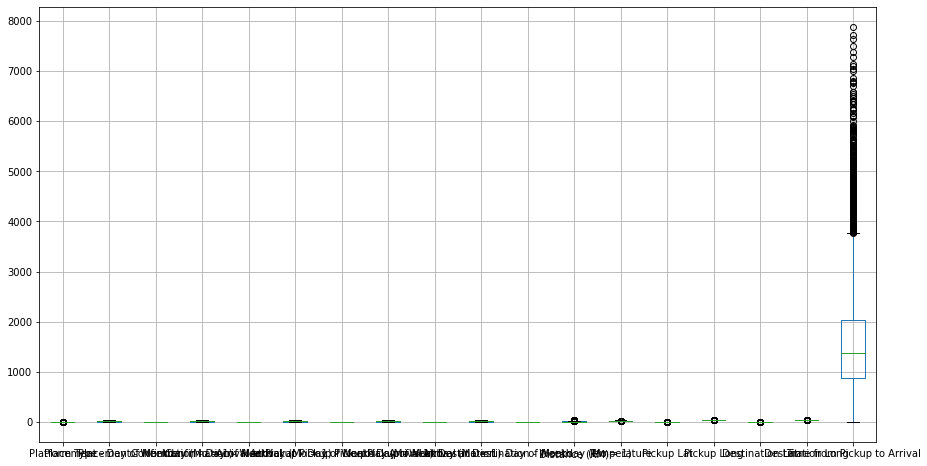

In [143]:
# visualizing the distribution of outliers
plt.figure(figsize = (15, 8))
df.boxplot()
plt.show()

In [144]:
# getting the records with outliers
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

outliers_df = df[((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).any(axis = 1)]
print(outliers_df.shape)
outliers_df.sample(3)

(6303, 24)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival,placement_time_24,confirmation_time_24,arrival_at_pickup_time_24,pickup_time_24,arrival_at_destination_time_24,placement_time_HH
10313,3,21,3,21,3,21,3,21,3,21,3,13,22.0,-1.316959,36.700003,-1.296283,36.784968,2103,103143,103200,104149,104904,112407,10
2852,3,2,4,2,4,2,4,2,4,2,4,11,23.7,-1.261012,36.723615,-1.294165,36.797731,4726,170823,172344,174450,180356,192242,17
167,3,24,1,24,1,24,1,24,1,24,1,20,23.5,-1.257147,36.795063,-1.370038,36.919017,2288,125620,125627,125942,134411,142219,12


In [145]:
# calculating percentage of outliers
round((outliers_df.shape[0] / df.shape[0]) * 100, 4)

29.7297

In [146]:
df.dtypes

Platform Type                                  int64
Placement - Day of Month                       int64
Placement - Weekday (Mo = 1)                   int64
Confirmation - Day of Month                    int64
Confirmation - Weekday (Mo = 1)                int64
Arrival at Pickup - Day of Month               int64
Arrival at Pickup - Weekday (Mo = 1)           int64
Pickup - Day of Month                          int64
Pickup - Weekday (Mo = 1)                      int64
Arrival at Destination - Day of Month          int64
Arrival at Destination - Weekday (Mo = 1)      int64
Distance (KM)                                  int64
Temperature                                  float64
Pickup Lat                                   float64
Pickup Long                                  float64
Destination Lat                              float64
Destination Long                             float64
Time from Pickup to Arrival                    int64
placement_time_24                             

In [147]:
#converting the objects to float
# df["Temperature",] = df.Temperature.astype(float)
# # df["Pickup Lat",] = df.Pickup_Lat.astype(float)
df["confirmation_time_24"] = pd.to_numeric(df.confirmation_time_24, errors='coerce')
df["arrival_at_pickup_time_24"] = pd.to_numeric(df.arrival_at_pickup_time_24, errors='coerce')
df["pickup_time_24"] = pd.to_numeric(df.pickup_time_24, errors='coerce')
df["arrival_at_destination_time_24"] = pd.to_numeric(df.arrival_at_destination_time_24, errors='coerce')
df["placement_time_HH"] = pd.to_numeric(df.placement_time_HH, errors='coerce')
# df["Destination Long",] = df.["Destination Long"].astype(float)
# # df["Temp",] = weather.Temp.astype(float)

#Implementation and Evaluation

In [148]:
# We select our features
# We perform normalisation and standardisation techniques to our dataset then fit the data to various models.
# X = df.iloc[:, [1, 2 ,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]].values  # Independent/predictor variables
# y = df.iloc[:, 18].values          # Dependent/label variable

orders = list(df.columns.values)
orders.remove('arrival_at_destination_time_24')
X = df[orders]

# Selecting our target variable
# ---
#
y = df['arrival_at_destination_time_24']

In [149]:
# Splitting our dataset 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 42)

In [150]:
df.dtypes

Platform Type                                  int64
Placement - Day of Month                       int64
Placement - Weekday (Mo = 1)                   int64
Confirmation - Day of Month                    int64
Confirmation - Weekday (Mo = 1)                int64
Arrival at Pickup - Day of Month               int64
Arrival at Pickup - Weekday (Mo = 1)           int64
Pickup - Day of Month                          int64
Pickup - Weekday (Mo = 1)                      int64
Arrival at Destination - Day of Month          int64
Arrival at Destination - Weekday (Mo = 1)      int64
Distance (KM)                                  int64
Temperature                                  float64
Pickup Lat                                   float64
Pickup Long                                  float64
Destination Lat                              float64
Destination Long                             float64
Time from Pickup to Arrival                    int64
placement_time_24                             

In [151]:
# Fitting in our models 
# ---
from sklearn.svm import SVR 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor 
svm_regressor = SVR(kernel='rbf', C=10)
knn_regressor = KNeighborsRegressor()
dec_regressor = DecisionTreeRegressor(random_state=27)

svm_regressor = SVR(kernel='rbf', C=10)
knn_regressor = KNeighborsRegressor()
dec_regressor = DecisionTreeRegressor(random_state=27)

svm_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)
dec_regressor.fit(X_train, y_train)

# Making Predictions  
svm_y_pred = svm_regressor.predict(X_test)
knn_y_pred = knn_regressor.predict(X_test)
dec_y_pred = dec_regressor.predict(X_test)



In [152]:
# Making Predictions  
svm_y_pred = svm_regressor.predict(X_test)
knn_y_pred = knn_regressor.predict(X_test)
dec_y_pred = dec_regressor.predict(X_test)

# Evaluating our models 
from sklearn import metrics
print('SVM RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm_y_pred)))
print('KNN RMSE:', np.sqrt(metrics.mean_squared_error(y_test, knn_y_pred)))
print('Decision Tree RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dec_y_pred)))

SVM RMSE: 15098.427159448116
KNN RMSE: 1380.7790868312395
Decision Tree RMSE: 899.6810405749925


#Feature Transformation: Example: Principal Component Analysis

In [153]:
# Again, create our base models and check for the accuracy to later compare it
# later with our PCA implementation.
from sklearn.preprocessing import MinMaxScaler
# We select our features
X = df[orders]
y = df['arrival_at_destination_time_24']

# Splitting our dataset  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 42)

# Performing normalisation  
norm = MinMaxScaler().fit(X_train) 
X_train = norm.transform(X_train) 
X_test = norm.transform(X_test)

# Fitting in our models   
svm_regressor = SVR(kernel='rbf', C=10)
knn_regressor = KNeighborsRegressor()
dec_regressor = DecisionTreeRegressor(random_state=27)

svm_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)
dec_regressor.fit(X_train, y_train)

# Making Predictions  
svm_y_pred = svm_regressor.predict(X_test)
knn_y_pred = knn_regressor.predict(X_test)
dec_y_pred = dec_regressor.predict(X_test)

# Finally, evaluating our models  
print('SVM RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm_y_pred)))
print('KNN RMSE:', np.sqrt(metrics.mean_squared_error(y_test, knn_y_pred)))
print('Decision Tree RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dec_y_pred)))

SVM RMSE: 21661.703843414696
KNN RMSE: 6203.281288338806
Decision Tree RMSE: 938.5777666349126


In [154]:
#Apply PCA to our dataset
# We select our features
X = df[orders]
y = df['arrival_at_destination_time_24']
# Splitting our dataset  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 42)
# Performing normalisation 
norm = MinMaxScaler().fit(X_train) 
X_train = norm.transform(X_train) 
X_test = norm.transform(X_test)
# Applying PCA
# NB: PCA relies the feature set and not the label data.
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Fitting in our models   
svm_regressor = SVR(kernel='rbf', C=10)
knn_regressor = KNeighborsRegressor()
dec_regressor = DecisionTreeRegressor(random_state=27)

svm_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)
dec_regressor.fit(X_train, y_train)

# Making Predictions  
svm_y_pred = svm_regressor.predict(X_test)
knn_y_pred = knn_regressor.predict(X_test)
dec_y_pred = dec_regressor.predict(X_test)

# Finally, evaluating our models 
print('SVM RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm_y_pred)))
print('KNN RMSE:', np.sqrt(metrics.mean_squared_error(y_test, knn_y_pred)))
print('Decision Tree RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dec_y_pred)))

SVM RMSE: 21707.65345475214
KNN RMSE: 6203.281288338806
Decision Tree RMSE: 3790.700009644526
